# Tips Dataset Explored


### Fundamentals of Data Analysis Assessment 2019

In [1]:
import seaborn as sns # Importing the required libraries and give them a shorter name.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import warnings
# warnings.filterwarnings("ignore") # Added this code at the end, to make the notebook more visually attractive. https://exploredatalab.com/how-to-suppress-warnings-in-jupyter-notebook/

In [2]:
 tips = sns.load_dataset("tips") # Import the dataset we will be working with.

## Part 1: Tips Dataset Described

First, let's have a look at the dataset we will be looking into:

In [3]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


First of all, the last few entries look perfect, so it seems there is no missing data in this dataset. The dataset consists of 244 rows and 7 columns. 244 people (and their party) have enjoyed food and drinks in a restaurant and paid their bill. This dataset shows us the size of their tip, and 6 other variables which may influence this tip. 

In [4]:
tips.describe() # This function quickly shows an overview of the numeric variables in the dataset.

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


What do these rows mean?

- **count**: this is the total amount of rows
- **mean**: also called the average. This is the number you get when adding up all data in a certain column (e.g. all tips) and divide it by the count. A dataset is usually spread around the mean, so this value is crucial.
- **std**: Standarddeviation is a way to measure the spread of a dataset. A low std indicates that values are close to the mean, whereas a high std indicated big variation in the values, in which case it's important to look at the median (middle value) as well.
- **min**: smallest value
- **25%**: 25% of values in the column are lower, and 75% higher than this number
- **50%**: also called median, 50% of values is lower and 50% higher than this value.
- **75%**: 75% of values in the column are lower, 25% higher than this number.
- **max**: biggest value

Panda's <em>describe</em> function, quickly gives us an idea of a dataset. The mean (average) total bill appears to be just under 20 dollars and the mean tip about 3 dollars. The median total bill and tip are both fairly close to the mean, which would suggest a fairly symmetrical distribution. The biggest tip was 10 dollars, and the smallest tip 1 dollar. Interesting to note is the fact that every single person who paid their bill, also gave a tip. This might be normal in the US, but this probably would not be the case over here in Ireland. Anyway, let's have a closer look at the dataset and it's variables.

**Total_bill** is a float, which tells us the total bill that was to be paid. Total_bill ranges from a minimum of 3.07 dollars to a maximum of 50.81 dollars, with a mean of 19.78 dollars. Let's visualize the data for this variable with a plot:

C:\Users\Arnoud\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


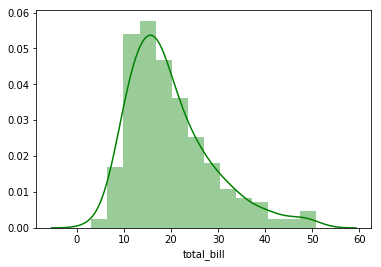

In [5]:
sns.distplot(tips["total_bill"], color="g"); # Plot a distplot of variable total_bill in green.

As you can see, the vast majority of <em> total bills </em> centres around the mean of 19.78 dollars.

The variable called **tips** shows what size tip was left when paying the bill. The smallest tip was 1 dollar, while the biggest one was 10 dollars. The mean(average) tip was 2.99 dollars, with a median of 2.9.

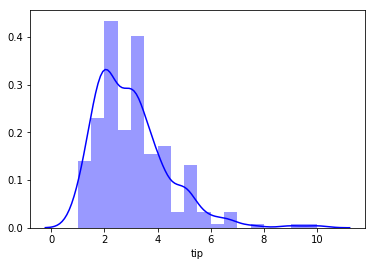

In [6]:
sns.distplot(tips["tip"], color="b");

When looking at the plot for the <em>tip</em> variable, again we can see that most values centre around the mean of 2.99.

The **sex** variable tells us whether the person who paid was male or female. This variable only has 2 possible values.

In [7]:
# First I read in the raw dataset as "df" to make it easier to extract data from the set.
df = pd.read_csv("https://raw.githubusercontent.com/pandas-dev/pandas/master/doc/data/tips.csv")
print ("Total amount of male tippers = ", df.sex[df.sex == "Male"].count()) # https://stackoverflow.com/questions/35277075/python-pandas-counting-the-occurrences-of-a-specific-value
print ("Total amount of females tippers = ", df.sex[df.sex == "Female"].count())

Total amount of male tippers =  157
Total amount of females tippers =  87


The third variable that was recorded is whether the person was a **smoker** or not. This variable again can only have 2 values: yes or no.

In [8]:
print ("Total amount of smoking tippers = ", df.smoker[df.smoker == "Yes"].count())
print ("Total amount of non-smoking tippers = ", df.smoker[df.smoker == "No"].count())

Total amount of smoking tippers =  93
Total amount of non-smoking tippers =  151


The **day** variable shows us what day of the week it was when the tip was given. The only days mentioned here are Thursday, Friday, Saturday and Sunday. The restaurant might have been closed the other 3 days, or perhaps there was no data collection on the those days. Let's visualize how often each day is represented in the tips dataset:

In [9]:
print ("Total amount of bills paid on Thursdays in this dataset = ", df.day[df.day == "Thur"].count()) # https://stackoverflow.com/questions/35277075/python-pandas-counting-the-occurrences-of-a-specific-value
print ("Total amount of bills paid on Fridays in this dataset = ", df.day[df.day == "Fri"].count())
print ("Total amount of bills paid on Saturdays in this dataset = ", df.day[df.day == "Sat"].count())
print ("Total amount of bills paid on Sundays in this dataset = ", df.day[df.day == "Sun"].count())

Total amount of bills paid on Thursdays in this dataset =  62
Total amount of bills paid on Fridays in this dataset =  19
Total amount of bills paid on Saturdays in this dataset =  87
Total amount of bills paid on Sundays in this dataset =  76


In [10]:
Thursdays = df.day[df.day == "Thur"].count() # 
Fridays = df.day[df.day == "Fri"].count()
Saturdays = df.day[df.day == "Sat"].count()
Sundays = df.day[df.day == "Sun"].count()

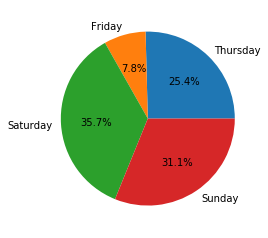

In [11]:
a = ([Thursdays, Fridays, Saturdays, Sundays]) #learned about pie chart here: https://pythonspot.com/matplotlib-pie-chart/
labels = "Thursday", "Friday", "Saturday", "Sunday"
plt.pie(a,labels = labels, autopct ="%1.1f%%");

What is striking is the low number of bills paid on Fridays. Even Thursdays are much busier.  We can only guess as to what the reason could be.

The **time** variable tells us if it was a lunch or a dinner that was paid for. Again, only 2 possible values here.

In [12]:
print ("Amount of lunch tips = ", df.time[df.time == "Lunch"].count())
print ("Amount of dinner tips = ", df.time[df.time == "Dinner"].count())

Amount of lunch tips =  68
Amount of dinner tips =  176


And lastly, **size** tells us the size of the party for which the person was paying. As can be seen in the array below: the smallest value here is 1, while the biggest party consisted of 6 people, and the mean is 2.57.

In [13]:
partysize = df['size'].value_counts(); # https://stackoverflow.com/questions/22391433/count-the-frequency-that-a-value-occurs-in-a-dataframe-column/36434248

In [14]:
partysize

2    156
3     38
4     37
5      5
6      4
1      4
Name: size, dtype: int64

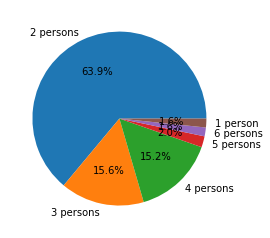

In [15]:
labels = "2 persons", "3 persons", "4 persons", "5 persons", "6 persons", "1 person"
plt.pie(partysize, labels = labels, autopct ="%1.1f%%");

By far the most common size of the party was 2, followed by 3 and 4. Parties of 1,5 and 6 were rare.

Before I start looking into the correlations between the different variables. Let's first have a bit of fun with this dataset:

In [16]:
tips.groupby(["sex", "day"]).max() # https://www.geeksforgeeks.org/pandas-groupby/

size    tip  total_bill
sex    day                          
Male   Thur     6   6.70       41.19
       Fri      4   4.73       40.17
       Sat      5  10.00       50.81
       Sun      6   6.50       48.17
Female Thur     6   5.17       43.11
       Fri      3   4.30       22.75
       Sat      4   6.50       44.30
       Sun      5   5.20       35.26

Above table shows the maximum tip that was given by males and females, on all 4 days.

In [17]:
tips.groupby(["sex", "day"]).min()

size   tip  total_bill
sex    day                         
Male   Thur     2  1.44        7.51
       Fri      1  1.50        8.58
       Sat      2  1.00        7.74
       Sun      2  1.32        7.25
Female Thur     1  1.25        8.35
       Fri      2  1.00        5.75
       Sat      1  1.00        3.07
       Sun      2  1.01        9.60

This table shows the minimum tip given per day, per sex.

In [18]:
tips.groupby(["sex", "day"]).sum()

total_bill     tip  size
sex    day                           
Male   Thur      561.44   89.41    73
       Fri       198.57   26.93    21
       Sat      1227.35  181.95   156
       Sun      1269.46  186.78   163
Female Thur      534.89   82.42    79
       Fri       127.31   25.03    19
       Sat       551.05   78.45    63
       Sun       357.70   60.61    53

Here we can see the total amount spent in the restaurant per day and per sex. Notice how much more males are turning over in the weekend, both in <em>total_bill</em> as in <em>tip</em>.

All in all, this is a potentially interesting dataset. In my opinion, it could have been even better if they had asked the people paying how they would rate the service. Then we could have investigated if there is a correlation between tip size and service provided; something I believe is not as obvious as people might think it is. Anyway, this is for another time. Let's now focus on possible correlations between the variables used in this dataset.

## Part 2: Possible relationship between total bill and tip

### 2.1 Correlation between total bill and tip

In this part I am going to have a look at the possible relationship between the total bill and the tip that was left. To do this I will visualise the relationship and explain in detail how the two variables are (possibly) related.

Below is a scatterplot with the total bill on the x-axis, and the tip size on the y-axis.

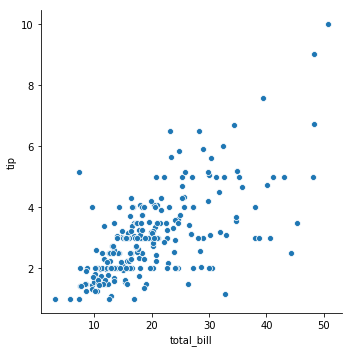

In [19]:
sns.relplot(x="total_bill", y="tip", data=tips);

This scatterplot gives us a first idea of what the relationship might be. It looks like, on average, the higher the bill, the higher the tip will be. This is because, the further to the right of the x-axis you look, the higher the dots are on the y-axis. Of course there are some exceptions, but the correlation seems to be pretty strong.

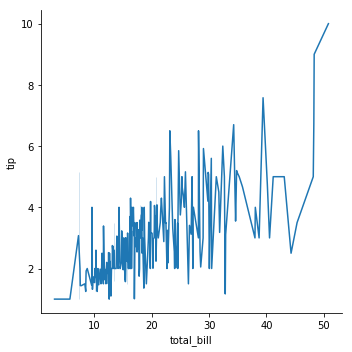

In [20]:
sns.relplot(x="total_bill", y="tip", kind="line", data=tips);

The above lineplot, while clearly not as suitable as the scatterplot, still shows us in the blink of an eye, the trend of the higher the bill, the higher the tip.

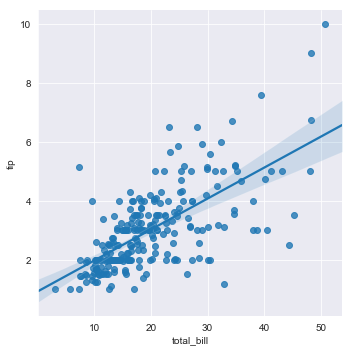

In [21]:
sns.set_style('darkgrid') 
sns.lmplot(x ='total_bill', y ='tip', data = tips); #https://seaborn.pydata.org/generated/seaborn.lmplot.html

In the lmplot above the regression model is visible as well as the scattered dots. This emphasizes again the strong relationship between x (total_bill) and y (tip).

I am now going to divide the <em> tips </em> dataset into 3 subsets. These subsets are: **lowbills** from 0 to 13 dollar, **avgbills**, from 13.01 till 19 dollars, and **bigbills**, higher than 19 dollars. After looking at the correlation between the total bill and the tip size, I want to have a look at the possible correlation between total bill and tip percentage. 

To do this, I will generate a new dataframe **billtip** with added variable <em>tip_percentage</em>. 

In [22]:
df = pd.read_csv("https://raw.githubusercontent.com/pandas-dev/pandas/master/doc/data/tips.csv") # Reading the tips dataset from github to be used as a dataframe

In [23]:
billtip = df

In [24]:
billtip["tip_percentage"] = billtip["tip"]/billtip["total_bill"] # Adding a new column with tip_percentage, which I will use later. Used this link: https://stackoverflow.com/questions/36619631/how-to-divide-two-column-in-a-dataframe

In [25]:
billtip

,total_bill,tip,sex,smoker,day,time,size,tip_percentage
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808
5,25.29,4.71,Male,No,Sun,Dinner,4,0.186240
6,8.77,2.00,Male,No,Sun,Dinner,2,0.228050
7,26.88,3.12,Male,No,Sun,Dinner,4,0.116071
8,15.04,1.96,Male,No,Sun,Dinner,2,0.130319
9,14.78,3.23,Male,No,Sun,Dinner,2,0.218539


Now, I am going to use the <em>between</em> function to select only the **lowbills** between 0 and 12 dollars. I used this link to learn about this: https://stackoverflow.com/questions/31617845/how-to-select-rows-in-a-dataframe-between-two-values-in-python-pandas/40442778

In [26]:
lowbills = billtip[df['total_bill'].between(0, 12)]

The second subset of data consists of the **avgbills** between 12.01 (to prevent possible overlap with group 1) and 24 dollar:

In [27]:
avgbills = billtip[df['total_bill'].between(12.01, 24)]

And the last subset **bigbills** consists of all bills higher than 24 dollar

In [28]:
bigbills = billtip[df['total_bill'].between(24.01, 51)] # in tips.describe I could see the max bill was just over 50 dollars, so I can use 51 as the highest value.

Let's visualize these 3 datasets: 

Text(0.5, 1.0, 'Bills higher than 24 dollars')

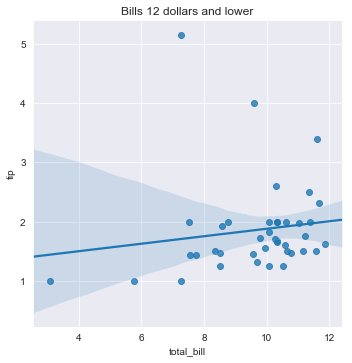

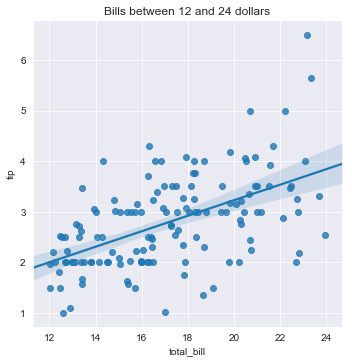

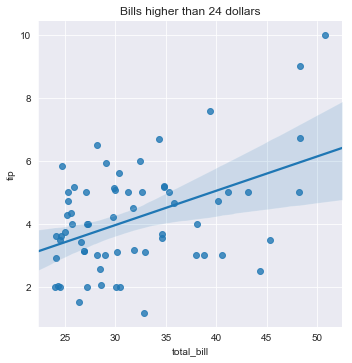

In [29]:
sns.lmplot(x="total_bill", y="tip", data=lowbills)
plt.title("Bills 12 dollars and lower") # Learned about giving titles to plot in seaborn here: https://stackoverflow.com/questions/29813694/how-to-add-a-title-to-seaborn-facet-plot
sns.lmplot(x="total_bill", y="tip", data=avgbills)
plt.title("Bills between 12 and 24 dollars")
sns.lmplot(x="total_bill", y="tip", data=bigbills)
plt.title("Bills higher than 24 dollars")


Looking at these lmplots, again there is a clear correlation, in every category, between <em>total_bill</em> and <em>tip</em>. The correlation is strongest in <em>avgbills</em> and <em>bigbills</em>. The blue line is the indicator of the correlation and the steeper, the stronger the correlation between x and y. This was to be expected of course, so now I want to know if there is also a correlation between the <em>total_bill</em> and the <em>tip_percentage</em>.

### 2.2 Correlation between total bill and tip percentage

In [30]:
billtip.describe()

,total_bill,tip,size,tip_percentage
count,244.000000,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672,0.160803
std,8.902412,1.383638,0.951100,0.061072
min,3.070000,1.000000,1.000000,0.035638
25%,13.347500,2.000000,2.000000,0.129127
50%,17.795000,2.900000,2.000000,0.154770
75%,24.127500,3.562500,3.000000,0.191475
max,50.810000,10.000000,6.000000,0.710345


Before I look for possible correlations, I first want to have a look at the data in the <em>tip_percentage</em> column. A few things stand out. The mean and the median are very close, which shows me this variable probably has a pretty symmetrical distribution. However, there is a maximum tip of 71 percent, which, with a mean of 16, seems very extreme. Let's plot the data and see what else we can find out.

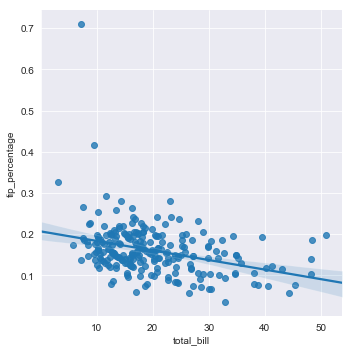

In [31]:
sns.lmplot(x="total_bill", y="tip_percentage", data=billtip);

The scatterplot shown above shows us the possible correlation between <em>total bill</em> and <em>tip percentage</em>. 
There seems to be a small negative correlation. The tips get relatively smaller as the bills get bigger.

Let's have a look at the possible correlation between <em>total bill</em> and <em>tip percentage</em> for each of the 3 groups of data I created from the main tips dataset.

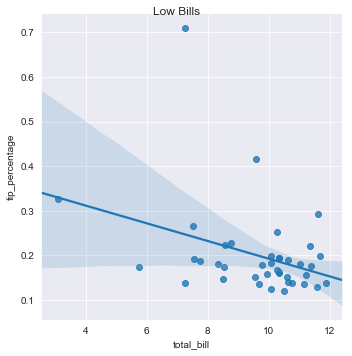

In [32]:
a = sns.lmplot(x="total_bill", y="tip_percentage", data=lowbills)
a.fig.suptitle("Low Bills"); # https://stackoverflow.com/questions/29813694/how-to-add-a-title-to-seaborn-facet-plot

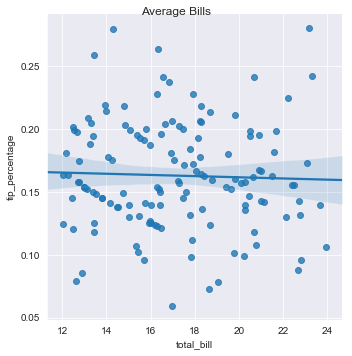

In [33]:
b = sns.lmplot(x="total_bill", y="tip_percentage", data=avgbills)
b.fig.suptitle("Average Bills");

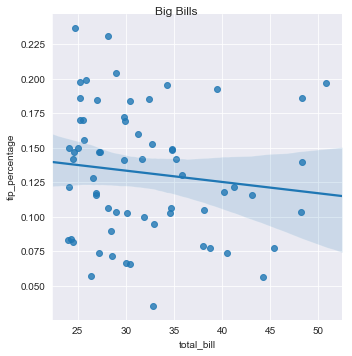

In [34]:
c = sns.lmplot(x="total_bill", y="tip_percentage", data=bigbills)
c.fig.suptitle("Big Bills");

The strongest negative correlation can be seen in the <em>lowbills</em> group. A slightly less strong, but still clear correlation can be seen for <em>bigbills</em> and a weak negative correlation is seen in the lmplot for <em>avgbills</em>.

In [35]:
lowbills.describe()

,total_bill,tip,size,tip_percentage
count,40.000000,40.000000,40.00000,40.000000
mean,9.640250,1.859000,1.95000,0.199334
std,1.799341,0.790225,0.38895,0.101410
min,3.070000,1.000000,1.00000,0.118934
25%,8.565000,1.465000,2.00000,0.150596
50%,10.180000,1.665000,2.00000,0.176319
75%,10.680000,2.000000,2.00000,0.197758
max,11.870000,5.150000,3.00000,0.710345


In [36]:
avgbills.describe()

,total_bill,tip,size,tip_percentage
count,140.000000,140.000000,140.000000,140.000000
mean,17.125714,2.787214,2.335714,0.163028
std,3.199846,0.903971,0.652728,0.042763
min,12.020000,1.000000,2.000000,0.059447
25%,14.437500,2.000000,2.000000,0.137366
50%,16.875000,2.745000,2.000000,0.157688
75%,19.780000,3.280000,2.000000,0.195036
max,23.950000,6.500000,5.000000,0.280535


In [37]:
bigbills.describe()

,total_bill,tip,size,tip_percentage
count,64.000000,64.000000,64.000000,64.000000
mean,31.946250,4.172031,3.468750,0.131853
std,7.056394,1.694743,1.126432,0.046695
min,24.010000,1.170000,2.000000,0.035638
25%,26.545000,3.000000,2.750000,0.098514
50%,29.995000,4.000000,4.000000,0.134881
75%,34.937500,5.000000,4.000000,0.169496
max,50.810000,10.000000,6.000000,0.236746


What can be seen from above arrays is that the mean tip percentage gets lower, as the bills get higher. For **lowbills** the mean tip percentage is 18.6%, for **avgbills** 16.7%, and for **bigbills** this percentage is 14.2%.

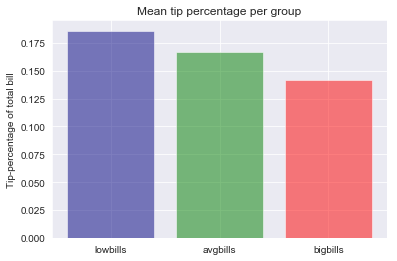

In [38]:
objects = ("lowbills", "avgbills", "bigbills") # https://pythonspot.com/matplotlib-bar-chart/
meantippct = [0.186, 0.167, 0.142]
yheight = np.arange(len(objects))

plt.bar(yheight,meantippct, align='center', alpha=0.5, color=("navy", "green", "red"))
plt.xticks(yheight, objects)
plt.ylabel('Tip-percentage of total bill')
plt.title("Mean tip percentage per group")

plt.show()

In above bar chart is clearly visible the small, but existing, negative correlation between the size of the bill and the tip percentage.

## Part 3: Analysis of relationships between other variables within the dataset

In this section I am going to have a look at some other potentially interesting correlations in the <em>tips</em> dataset.

### 3.1 Pairplots for a quick overview

Before I start looking at the correlations between the variables in detail, I am going to use the pairplot function that is built in in the <em> seaborn</em> package. This uses will give us a quick overview of any possibly interesting correlations. This will only plot the numeric variables though, so I will add another variable by using different colours. I am not a big fan of adding multiple variables by also changing the shape of the dots, so I will instead add the non-numeric variables one by one.

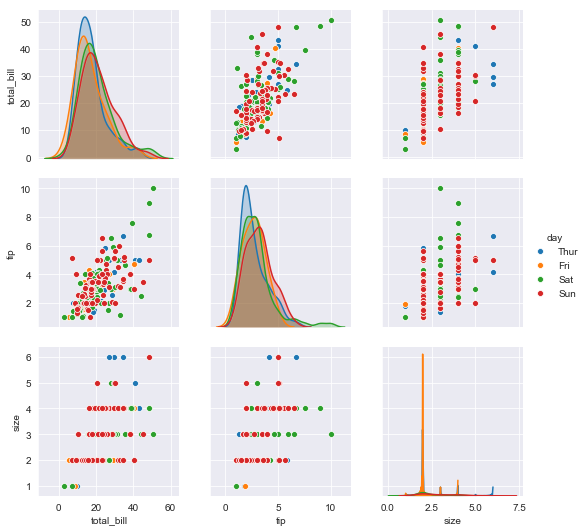

In [104]:
sns.pairplot(tips, hue = "day");

First we are looking at the correlation between the variables **day** and the numeric variables **size**, **tip** and **total_bill**. No real surprises here. We already knew that there was a positive correlation between total bill and tip, and the fact that a bigger size party makes for a higher bill and therefore tip also can't be called surprising. The highest tips seem to have been given on Saturdays though, so this might be interesting to look into later.

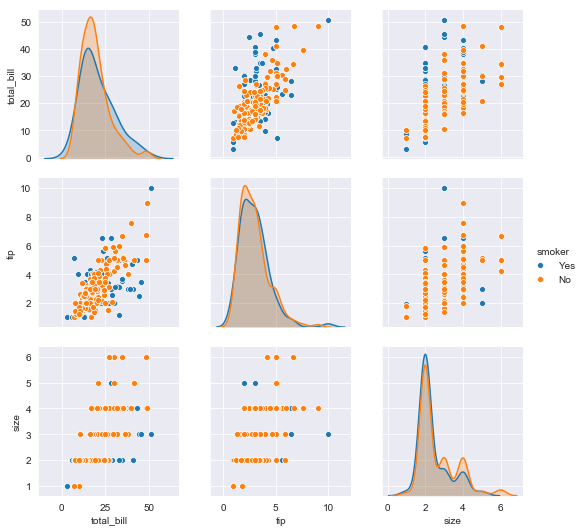

In [103]:
sns.pairplot(tips, hue = "smoker");

Now we are looking at the correlation between being a smoker and the numeric variables. At first sight nothing stands out for me here. It looks like smokers might, on average, have slightly higher bills, but it's hard to see for sure. We will have to find out later when looking at the exact figures.


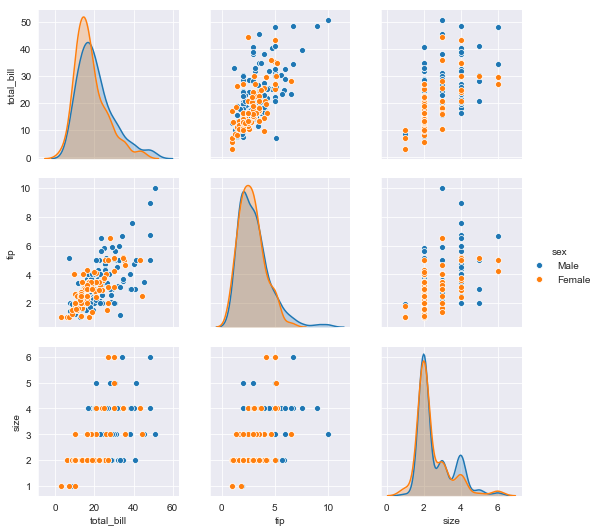

In [102]:
sns.pairplot(tips, hue = "sex");

Above pairplot shows us the correlation between the sex of the person who paid the bill, and the <em>total bill</em>, <em>the tip</em> and the <em>size</em> of the party. First thing to notice is that there are many more men settling the bill than there are women. This could be a case of men being gentlemen, or maybe the restaurant in general attracts more males. Impossible to say without further data. What can be seen is that nearly all big tips are being paid by men. So it would seem that in this dataset men are more generous. This is definitely something I will look into more later.

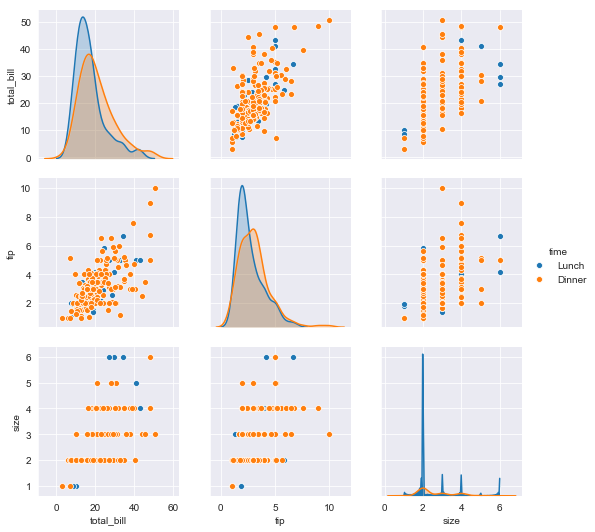

In [101]:
sns.pairplot(tips, hue = "time");

At first sight it looks like there were higher bills and higher tips at dinnertime. However, there also were much more dinners than lunches in general, so this might be deceiving. This will also have to be investigated in more detail before any conclusions can be drawn.

### 3.2 Correlation between time and tip

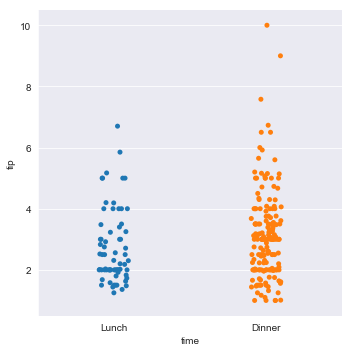

In [43]:
tips = sns.load_dataset("tips") #Plot a catplot, which is handy for categorical data.
sns.catplot(x="time", y="tip", data=tips); # https://seaborn.pydata.org/tutorial/categorical.html

Looking at above plot, it seems the tips for at dinner time are higher than those at lunch. However, there also were far more dinners recorded in this dataset. Therefore we need to look at the average tip and after that also the average relative tip (in percentage of the total bill).

In [44]:
lunchtip = billtip.loc[(billtip["time"]=="Lunch")] # https://www.geeksforgeeks.org/python-pandas-extracting-rows-using-loc/ and https://stackoverflow.com/questions/22546425/how-to-implement-a-boolean-search-with-multiple-columns-in-pandas
dinnertip = billtip.loc[(billtip["time"]=="Dinner")]

In [45]:
lunchtip.mean()

total_bill        17.168676
tip                2.728088
size               2.411765
tip_percentage     0.164128
dtype: float64

In [46]:
dinnertip.mean()

total_bill        20.797159
tip                3.102670
size               2.630682
tip_percentage     0.159518
dtype: float64

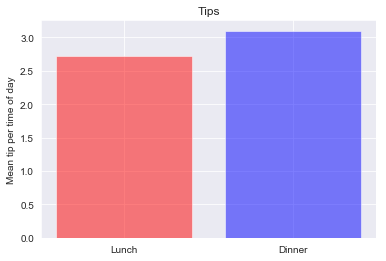

In [47]:
objects = ("Lunch", "Dinner") # https://pythonspot.com/matplotlib-bar-chart/
meantip = [2.72, 3.1]
yheight = np.arange(len(objects))

plt.bar(yheight,meantip, align='center', alpha=0.5, color=("red", "blue"))
plt.xticks(yheight, objects)
plt.ylabel('Mean tip per time of day')
plt.title("Tips")

plt.show()

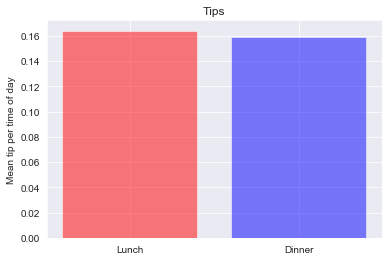

In [48]:
objects = ("Lunch", "Dinner") # https://pythonspot.com/matplotlib-bar-chart/
meantippct = [0.164128, 0.159518]
yheight = np.arange(len(objects))

plt.bar(yheight,meantippct, align='center', alpha=0.5, color=("red", "blue"))
plt.xticks(yheight, objects)
plt.ylabel('Mean tip per time of day')
plt.title("Tips")

plt.show()

We can see that tips are generally higher at dinner time, but this can be explained by the bills, which are also higher.
In fact, the relative tip size is slightly higher at lunch.

### 3.3 Correlation between day of the week and tip size

I would like to know if there is a correlation between the day of the week and the size of the tip. Are people more generous in the weekend? Let's find out.

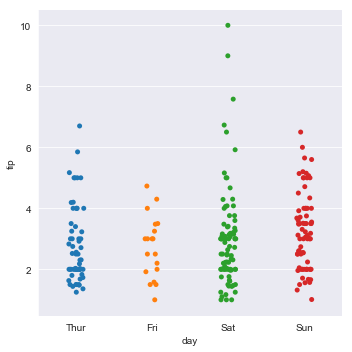

In [49]:
tips = sns.load_dataset("tips") #Plot a catplot, which is handy for categorical data.
sns.catplot(x="day", y="tip", data=tips); # https://seaborn.pydata.org/tutorial/categorical.html

At first sight it looks like Saturday and Sunday are the days for high tips. Let's have a look at the average tip for every day seperately.

First I am going to divide the dataset in 4, making a subset for every day of the week.

In [50]:
Thur = billtip.loc[(billtip["day"]=="Thur")] # https://www.geeksforgeeks.org/python-pandas-extracting-rows-using-loc/ and https://stackoverflow.com/questions/22546425/how-to-implement-a-boolean-search-with-multiple-columns-in-pandas
Fri = billtip.loc[(billtip["day"]=="Fri")]
Sat = billtip.loc[(billtip["day"]=="Sat")]
Sun = billtip.loc[(billtip["day"]=="Sun")]

In [51]:
Thur.mean()

total_bill        17.682742
tip                2.771452
size               2.451613
tip_percentage     0.161276
dtype: float64

In [52]:
Fri.mean()

total_bill        17.151579
tip                2.734737
size               2.105263
tip_percentage     0.169913
dtype: float64

In [53]:
Sat.mean()

total_bill        20.441379
tip                2.993103
size               2.517241
tip_percentage     0.153152
dtype: float64

In [54]:
Sun.mean()

total_bill        21.410000
tip                3.255132
size               2.842105
tip_percentage     0.166897
dtype: float64

I will visualize the average tip per day with a bar chart:

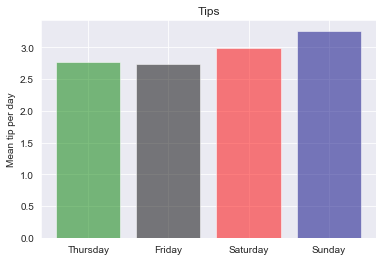

In [55]:
objects = ("Thursday", "Friday", "Saturday", "Sunday") # https://pythonspot.com/matplotlib-bar-chart/
meantip = [2.77, 2.73, 2.99, 3.26]
yheight = np.arange(len(objects))

plt.bar(yheight,meantip, align='center', alpha=0.5, color=("green", "black", "red", "navy"))
plt.xticks(yheight, objects)
plt.ylabel('Mean tip per day')
plt.title("Tips")

plt.show()

Now we know that the average tips are highest on Saturday and Sunday. But what about the tip size relative to the <em>total_bill</em>? I am going to us the variable <em> tip_percentage</em> to visualize this.

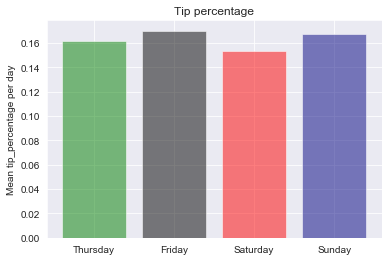

In [56]:
objects = ("Thursday", "Friday", "Saturday", "Sunday") # https://pythonspot.com/matplotlib-bar-chart/
meantippct = [0.161276, 0.169913, 0.153152, 0.166897]
yheight = np.arange(len(objects))

plt.bar(yheight,meantippct, align='center', alpha=0.5, color=("green", "black", "red", "navy"))
plt.xticks(yheight, objects)
plt.ylabel('Mean tip_percentage per day')
plt.title("Tip percentage")

plt.show()




As can be seen in the above bar chart, there is very little difference between the days and the relative tip sizes. Mean tip percentage is slightly higher on Friday and Sunday, but all 4 days are close to the mean tip percentage for the whole dataset of 16.08%.

### 3.4 Correlation between size and tip

In this section I will be looking at the variables <em> size </em> and <em> tip </em>. In the pairplot we could already see there was an (predictable) positive correlation between the size of the party and the tip size. However, I want to look into it a little bit more and see if the relative tip sizes are also correlated.

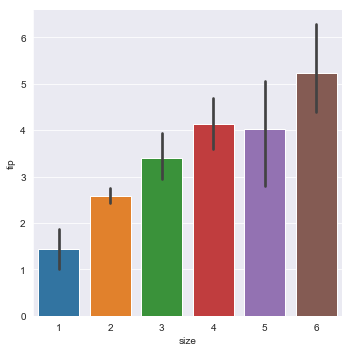

In [57]:
tips = sns.load_dataset("tips") #Plot a bar plot, which is handy for categorical data.
sns.catplot(x="size", y="tip", kind = "bar", data=tips); # https://seaborn.pydata.org/tutorial/categorical.html

In above bar plot it is clear to see the bigger the size, the bigger the mean tip. There is a small drop at parties of 5, but as we saw in chapter 1, there were only 5 instances of <em>size</em> 5, so hard to draw any real conclusions there. Let's have a look at those 5 times a party of 5 came to the restaurant and see if we can explain why the mean tip is lower than for parties of 4.

In [58]:
data = pd.read_csv("https://raw.githubusercontent.com/pandas-dev/pandas/master/doc/data/tips.csv", index_col = "size")
data.loc[5] # https://www.geeksforgeeks.org/python-pandas-extracting-rows-using-loc/

,total_bill,tip,sex,smoker,day,time
size,,,,,,
5,41.19,5.00,Male,No,Thur,Lunch
5,29.85,5.14,Female,No,Sun,Dinner
5,20.69,5.00,Male,No,Sun,Dinner
5,30.46,2.00,Male,Yes,Sun,Dinner
5,28.15,3.00,Male,Yes,Sat,Dinner


It turns out one tight man only tipped 2 dollars and dragged the mean tip down significantly.

Now I am curious to see the correlation between the <em>size</em> and the tip size relative to the total bill.

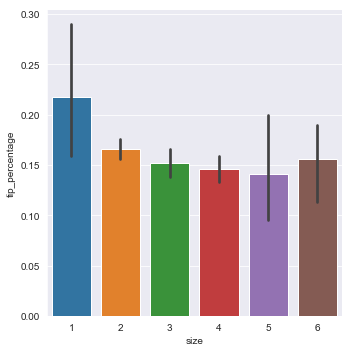

In [59]:
sns.catplot(x="size", y="tip_percentage", kind = "bar", data=billtip); # https://seaborn.pydata.org/tutorial/categorical.html

So while absolute tip size increases with the size of the party, the relative tip size does the opposite. Only at size 6 the tip percentage increases again, but we only had 4 parties of 6 people in this dataset, so again, this could be easily influenced by one generous tipper. Still interesting to note the steady decline, and this is also in line with our earlier finding that tips on higher bills usually are lower percentage wise.

### 3.5 Correlation between sex and tip

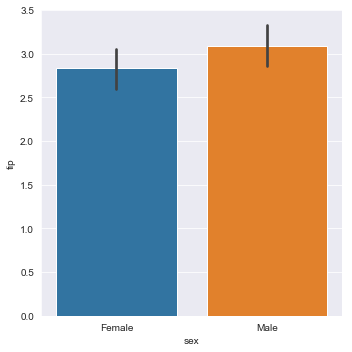

In [60]:
sns.catplot(x="sex", y="tip", kind = "bar", data=billtip); # https://seaborn.pydata.org/tutorial/categorical.html

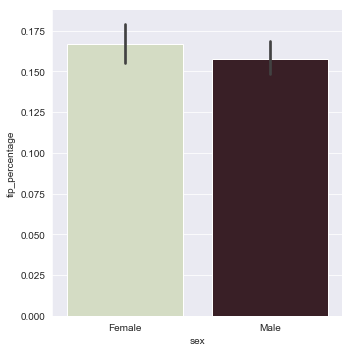

In [61]:
sns.catplot(x="sex", y="tip_percentage", kind = "bar", palette="ch:.6", data=billtip);

It turns out male tippers give slightly higher tips in absolute terms, but female tippers give relatively higher tips. Perhaps males pay more often for bigger size parties (their family)? This would explain both the higher absolute, and lower relative tips. Let's have a look.

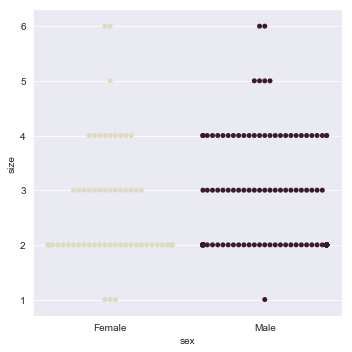

In [62]:
sns.catplot(x="sex", y="size", kind = "swarm", palette="ch:3.4", data=billtip);

Women are clearly represented more in <em> size </em> 1 and 2, where the tips are lower, but higher in relative terms. Men are represented much more in the bigger party sizes, where tips are higher in absolute terms, but relatively lower. It would be interesting to see how <em>sex</em> compares for <em>tip</em> for every different <em>size</em>. This way we can find out if sex plays a major part in tip size, or if the size of the party is more important. I will only look into size 2, 3 and 4, as there simply isn't enough data for the other sizes.

In [63]:
male2 = billtip.loc[(billtip["sex"]=="Male") & (billtip["size"] == 2 )] # https://stackoverflow.com/questions/22546425/how-to-implement-a-boolean-search-with-multiple-columns-in-pandas
male3 = billtip.loc[(billtip["sex"]=="Male") & (billtip["size"] == 3 )]
male4 = billtip.loc[(billtip["sex"]=="Male") & (billtip["size"] == 4 )]
female2 = billtip.loc[(billtip["sex"]=="Female") & (billtip["size"] == 2 )]
female3 = billtip.loc[(billtip["sex"]=="Female") & (billtip["size"] == 3 )]
female4 = billtip.loc[(billtip["sex"]=="Female") & (billtip["size"] == 4 )]

In [64]:
male2.mean()

total_bill        17.104082
tip                2.614184
size               2.000000
tip_percentage     0.162694
dtype: float64

In [65]:
male3.mean()

total_bill        24.287083
tip                3.476667
size               3.000000
tip_percentage     0.147641
dtype: float64

In [66]:
male4.mean()

total_bill        28.078214
tip                4.172143
size               4.000000
tip_percentage     0.150197
dtype: float64

In [67]:
female2.mean()

total_bill        15.339483
tip                2.528448
size               2.000000
tip_percentage     0.170830
dtype: float64

In [68]:
female3.mean()

total_bill        21.547143
tip                3.250000
size               3.000000
tip_percentage     0.159899
dtype: float64

In [69]:
female4.mean()

total_bill        30.278889
tip                4.021111
size               4.000000
tip_percentage     0.132734
dtype: float64

By dividing the mean <em>tip</em> by the mean <em> total_bill</em> we can see the tip percentageI am going to use a <em>grouped bar chart</em> to visualise this: https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/barchart.html

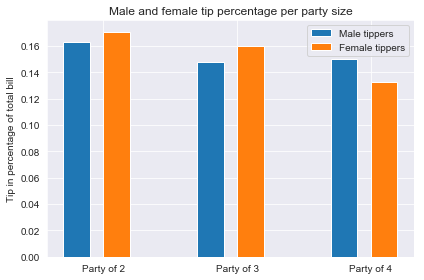

In [70]:
labels = ["Party of 2", "Party of 3", "Party of 4"]
maletippct = [0.162694, 0.147641, 0.150197]
femaletippct = [0.170830, 0.159899, 0.132734]

x = np.arange(len(labels)) # Location of the labels
width = 0.2 # width of bars
fig, ax = plt.subplots()

ax.bar(x - width, maletippct, width, label="Male tippers")
ax.bar(x + width/2, femaletippct, width, label="Female tippers")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel("Tip in percentage of total bill")
ax.set_title("Male and female tip percentage per party size")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

First thing to note is that the difference in relative tip sizes between the sexes is minimal and therefore it is hard to draw any real conclusions here. But looking at above chart we can see female tippers appear to tip relatively better when paying for parties of 2 and 3 than their male counterparts. However when a male is paying for 4 (possible his family), he is relatively more generous than females.

Earlier we noticed that the average bill is higher at dinner than at lunch, so could it be that women are having more lunch and therefore lower bills? Let's find out.

In [71]:
malelunch = billtip.loc[(billtip["sex"]=="Male") & (billtip["time"] == "Lunch" )]
femalelunch = billtip.loc[(billtip["sex"]=="Female") & (billtip["time"] == "Lunch" )]
maledinner = billtip.loc[(billtip["sex"]=="Male") & (billtip["time"] == "Dinner" )]
femaledinner = billtip.loc[(billtip["sex"]=="Female") & (billtip["time"] == "Dinner" )]

In [72]:
malelunch.describe()

,total_bill,tip,size,tip_percentage
count,33.000000,33.000000,33.000000,33.000000
mean,18.048485,2.882121,2.363636,0.166083
std,7.953435,1.329017,0.994302,0.045727
min,7.510000,1.440000,1.000000,0.078616
25%,13.030000,2.000000,2.000000,0.130491
50%,16.580000,2.310000,2.000000,0.156738
75%,21.160000,4.000000,2.000000,0.195335
max,41.190000,6.700000,6.000000,0.266312


In [73]:
femalelunch.describe()

,total_bill,tip,size,tip_percentage
count,35.000000,35.000000,35.000000,35.000000
mean,16.339143,2.582857,2.457143,0.162285
std,7.500803,1.075108,1.093910,0.034870
min,8.350000,1.250000,1.000000,0.072961
25%,12.065000,1.915000,2.000000,0.140416
50%,13.420000,2.010000,2.000000,0.153846
75%,17.865000,3.115000,2.000000,0.186289
max,43.110000,5.170000,6.000000,0.259314


In [74]:
maledinner.describe()

,total_bill,tip,size,tip_percentage
count,124.000000,124.000000,124.000000,124.000000
mean,21.461452,3.144839,2.701613,0.155407
std,9.460974,1.529116,0.936868,0.068948
min,7.250000,1.000000,2.000000,0.035638
25%,14.705000,2.000000,2.000000,0.117330
50%,19.630000,3.000000,2.000000,0.150959
75%,25.642500,3.722500,3.000000,0.184454
max,50.810000,10.000000,6.000000,0.710345


In [75]:
femaledinner.describe()

,total_bill,tip,size,tip_percentage
count,52.000000,52.000000,52.000000,52.000000
mean,19.213077,3.002115,2.461538,0.169322
std,8.202085,1.193483,0.827506,0.063399
min,3.070000,1.000000,1.000000,0.056433
25%,14.080000,2.230000,2.000000,0.140539
50%,17.190000,3.000000,2.000000,0.160705
75%,24.692500,3.527500,3.000000,0.195036
max,44.300000,6.500000,5.000000,0.416667


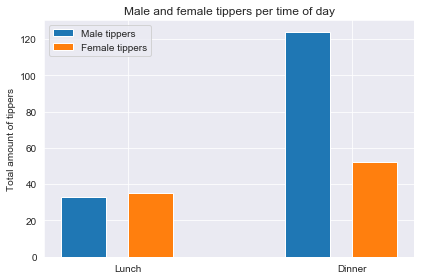

In [76]:
labels = ["Lunch", "Dinner"]
maletippct = [33, 124]
femaletippct = [35, 52]

x = np.arange(len(labels)) # Location of the labels
width = 0.2 # width of bars
fig, ax = plt.subplots()

ax.bar(x - width, maletippct, width, label="Male tippers")
ax.bar(x + width/2, femaletippct, width, label="Female tippers")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel("Total amount of tippers")
ax.set_title("Male and female tippers per time of day")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

Indeed we can see women are relatively more likely to pay for lunch, while men are more likely to pay for dinner. Since dinner is generally more expensive than lunch, this could explain why men, on average, pay higher bills than women. Still it does not describe the difference completely as the average bill is still lower for women, even when adjusted for time of day.

### 3.6 Correlation between smoking and tip

This time I want to have a closer look at the correlation between the tipper being a smoker or not, and the tip size.
First let's have a look at the effect of smoking on the correlation between total bill and the absolute tip size.

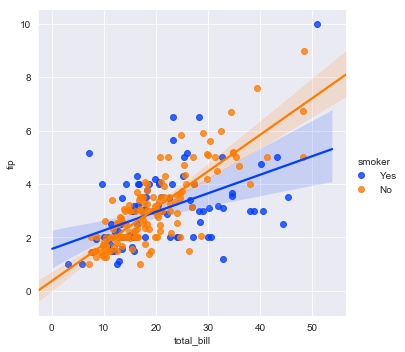

In [77]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips, palette = "bright" )

Smoking seems to have little effect on the correlation between <em>total_bill</em> and <em>tip</em>.
I will now use a catplot to visualize the direct effect of smoking on the tip.

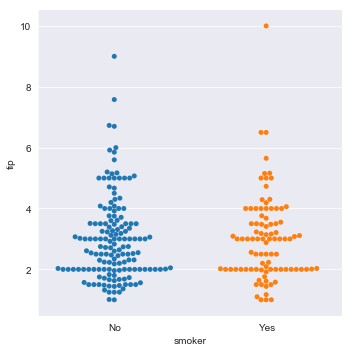

In [78]:
sns.catplot(x="smoker", y="tip", kind="swarm", order=["No", "Yes"], data=tips);

At first sight there appears to be little difference in tip sizes between smokers and non-smokers. Maybe if we calculate and visualize the average tip size, we will find something interesting.

In [79]:
smokingtipper = billtip.loc[(billtip["smoker"]=="Yes")]
nonsmokingtipper = billtip.loc[(billtip["smoker"]=="No")]

In [80]:
smokingtipper.mean()

total_bill        20.756344
tip                3.008710
size               2.408602
tip_percentage     0.163196
dtype: float64

In [81]:
nonsmokingtipper.mean()

total_bill        19.188278
tip                2.991854
size               2.668874
tip_percentage     0.159328
dtype: float64

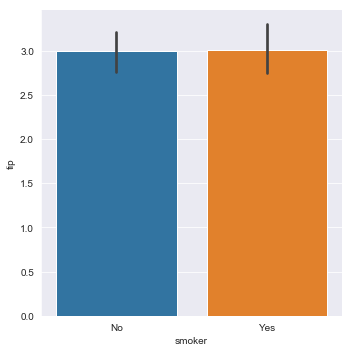

In [82]:
sns.catplot(x="smoker", y="tip", kind = "bar", data=billtip);

As you can see, the amount tipped is almost identical between smoking and non-smoking customers.

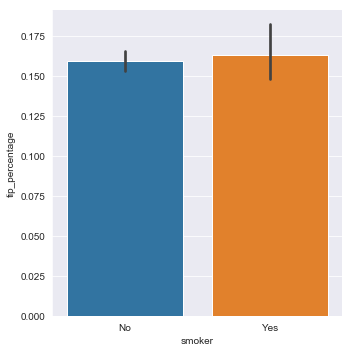

In [83]:
sns.catplot(x="smoker", y="tip_percentage", kind = "bar", data=billtip);

Tips from smokers are relatively higher than non-smokers, however the difference is marginal (16.3 vs 15.9 %).

### 3.7 Multiple variables combined: day, total_bill, sex and tip

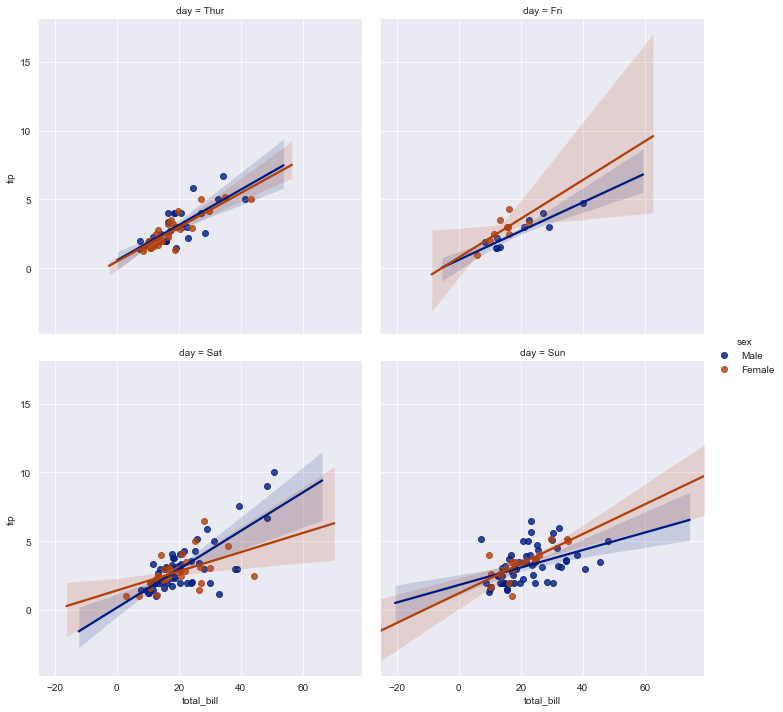

In [100]:
sns.lmplot(x="total_bill",y="tip", data= tips, col="day", col_wrap=2, hue="sex", palette="dark");


Again a clear correlation between <em>total_bill</em> and tip can be seen. Also interesting to see is the fact that female tippers give relatively bigger tips for bigger bills on Friday and Sunday, but Saturday seems to be the day when the male tippers are trying to impress and give big tips for big bills.

### 3.7.2 Multiple variables combined: Smoker, sex and size

I want to go a little bit outside the box here, and find out if smoking and/or sex have an effect on the size of the party. Perhaps smokers generally eat in smaller parties, as there are less smokers than non-smokers, and non-smokers might want to be far away from the smokers. And perhaps there is a difference between male and female smokers? Let's find out.

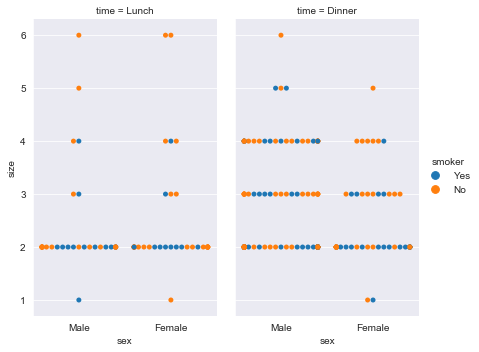

In [84]:
sns.catplot(x="sex", y="size", hue="smoker",
            col="time", aspect=.6,
            kind="swarm", data=tips); # https://seaborn.pydata.org/tutorial/categorical.html

Already we can see a trend where the largest parties are generally non-smoking.  

In [85]:
malesmoker = billtip.loc[(billtip["sex"]=="Male") & (billtip["smoker"] == "Yes" )]
femalesmoker = billtip.loc[(billtip["sex"]=="Female") & (billtip["smoker"] == "Yes" )]
malenonsmoker = billtip.loc[(billtip["sex"]=="Male") & (billtip["smoker"] == "No" )]
femalenonsmoker = billtip.loc[(billtip["sex"]=="Female") & (billtip["smoker"] == "No" )]

In [86]:
malesmoker.describe()

,total_bill,tip,size,tip_percentage
count,60.000000,60.000000,60.00000,60.000000
mean,22.284500,3.051167,2.50000,0.152771
std,9.911845,1.500120,0.89253,0.090588
min,7.250000,1.000000,1.00000,0.035638
25%,15.272500,2.000000,2.00000,0.101845
50%,20.390000,3.000000,2.00000,0.141015
75%,28.572500,3.820000,3.00000,0.191697
max,50.810000,10.000000,5.00000,0.710345


In [87]:
femalesmoker.describe()

,total_bill,tip,size,tip_percentage
count,33.000000,33.000000,33.000000,33.000000
mean,17.977879,2.931515,2.242424,0.182150
std,9.189751,1.219916,0.613917,0.071595
min,3.070000,1.000000,1.000000,0.056433
25%,12.760000,2.000000,2.000000,0.152439
50%,16.270000,2.880000,2.000000,0.173913
75%,22.120000,3.500000,2.000000,0.198216
max,44.300000,6.500000,4.000000,0.416667


In [88]:
malenonsmoker.describe()

,total_bill,tip,size,tip_percentage
count,97.000000,97.000000,97.000000,97.000000
mean,19.791237,3.113402,2.711340,0.160669
std,8.726566,1.489559,0.989094,0.041849
min,7.510000,1.250000,2.000000,0.071804
25%,13.810000,2.000000,2.000000,0.131810
50%,18.240000,2.740000,2.000000,0.157604
75%,22.820000,3.710000,3.000000,0.186220
max,48.330000,9.000000,6.000000,0.291990


In [89]:
femalenonsmoker.describe()

,total_bill,tip,size,tip_percentage
count,54.000000,54.000000,54.000000,54.000000
mean,18.105185,2.773519,2.592593,0.156921
std,7.286455,1.128425,1.073146,0.036421
min,7.250000,1.000000,1.000000,0.056797
25%,12.650000,2.000000,2.000000,0.139708
50%,16.690000,2.680000,2.000000,0.149691
75%,20.862500,3.437500,3.000000,0.181630
max,35.830000,5.200000,6.000000,0.252672


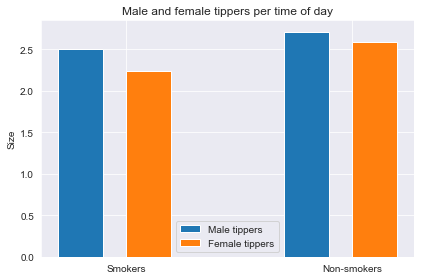

In [90]:
labels = ["Smokers", "Non-smokers"]
smokersize = [2.5, 2.711340]
nonsmokersize = [2.242424, 2.592593]

x = np.arange(len(labels)) # Location of the labels
width = 0.2 # width of bars
fig, ax = plt.subplots()

ax.bar(x - width, smokersize, width, label="Male tippers")
ax.bar(x + width/2, nonsmokersize, width, label="Female tippers")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel("Size")
ax.set_title("Male and female tippers per time of day")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

Non-smokers in this restaurant generally eat in bigger size parties than smokers. This is true both for men and for women.